In [21]:
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
df = pd.read_csv('./ride_times.csv')
df.head()

,time,last_check,Astro Orbiter,The Barnstormer,Big Thunder Mountain Railroad,Buzz Lightyear’s Space Ranger Spin,Country Bear Jamboree,Dumbo the Flying Elephant,Enchanted Tales with Belle,Frontierland Shootin’ Arcade,...,Space Mountain,Splash Mountain,Swiss Family Treehouse,Tom Sawyer Island,Tomorrowland Speedway,Tomorrowland Transit Authority PeopleMover,TRON Lightcycle / Run,Under the Sea – Journey of The Little Mermaid,Walt Disney’s Carousel of Progress,Walt Disney’s Enchanted Tiki Room
0,2023-06-23 09:07:51.858012,10:03am on Friday,15,5,40,35,-,5,-,-,...,35,-,-,-,15,5,-,5,5,-
1,2023-06-23 09:12:24.651756,10:11am on Friday,15,5,50,35,-,5,10,-,...,35,-,-,-,15,5,-,5,5,-
2,2023-06-23 09:21:39.612637,10:20am on Friday,15,5,50,30,-,5,15,-,...,35,-,-,-,20,5,-,5,5,-
3,2023-06-23 09:30:42.359776,10:27am on Friday,15,5,40,30,-,5,15,-,...,35,-,-,-,25,5,-,5,5,-
4,2023-06-23 09:36:44.171223,10:35am on Friday,15,5,35,30,-,5,30,-,...,35,-,-,-,20,5,-,5,5,-


In [23]:
import datetime

ugh = df[['last_check', 'Enchanted Tales with Belle']].copy()
ugh['Enchanted Tales with Belle'] = ugh['Enchanted Tales with Belle'].map(lambda a: 0 if a == '-' else a)
ugh['Enchanted Tales with Belle'] = ugh['Enchanted Tales with Belle'].astype(int)
ugh['last_check'] = ugh['last_check'].map(lambda a: a.replace(' on Friday', '').strip())
ugh['last_check'] = ugh['last_check'].map(lambda a: a.replace('am', '').strip())
ugh['last_check'] = ugh['last_check'].map(lambda a: a.replace('pm', '').strip())

ugh

,last_check,Enchanted Tales with Belle
0,10:03,0
1,10:11,10
2,10:20,15
3,10:27,15
4,10:35,30
5,10:44,45
6,10:52,45
7,11:00,15
8,11:08,15
9,11:15,25


<Axes: >

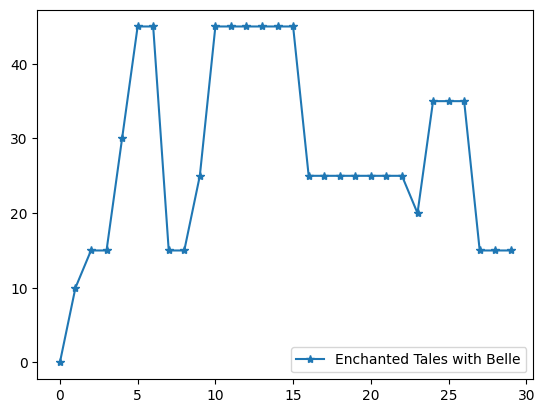

In [24]:
ugh.plot(marker='*')

In [ ]:
## history

In [87]:
import math

a = list(range(10))

window_size = 3
history = [math.nan] * window_size

for item in a:
    history.append(item)
    history.pop(0)

    print(history)


[nan, nan, 0]
[nan, 0, 1]
[0, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]
[4, 5, 6]
[5, 6, 7]
[6, 7, 8]
[7, 8, 9]


In [141]:
from typing import List, Sequence, Generic, TypeVar, Tuple

T = TypeVar('T')

class IterateTogether(Generic[T]):
    def __init__(self, seqs: List[Sequence[T]]):
        self._seqs = seqs
        self.reset()

    def reset(self) -> None:
        self._iters = [
            seq.__iter__() for seq in self._seqs
        ]

    def next(self) -> List[T]:
        return [
            item.__next__()
            for item in self._iters
        ]
    
class IterateTogetherWithHistory():
    def __init__(self, seqs:List[Sequence[float]], window_size:int = 5):
        self._iterate_together = IterateTogether(seqs)
        self._window_size = window_size
        self._history = [
            [math.nan] * (self._window_size + 1)
            for _ in range(len(seqs))
        ]

    def reset(self) -> None:
        self._iterate_together.reset()
        
    def next(self) -> List[Tuple[float, List[T]]]:
        observations: List[Tuple[float, List[T]]] = []
        for i, value in enumerate(self._iterate_together.next()):
            self._history[i] = [value] + self._history[i]
            self._history[i].pop()

            observations.append(
                (
                    value,
                    self._history[i][1:]
                )
            )

        return observations



data = [
    (3*a for a in range(20)),
    (4*a for a in range(20)),
    (5*a for a in range(20)),
]

blah = IterateTogetherWithHistory(data, window_size=3)

while True:
    print(list(blah.next()))

[(0, [nan, nan, nan]), (0, [nan, nan, nan]), (0, [nan, nan, nan])]
[(3, [0, nan, nan]), (4, [0, nan, nan]), (5, [0, nan, nan])]
[(6, [3, 0, nan]), (8, [4, 0, nan]), (10, [5, 0, nan])]
[(9, [6, 3, 0]), (12, [8, 4, 0]), (15, [10, 5, 0])]
[(12, [9, 6, 3]), (16, [12, 8, 4]), (20, [15, 10, 5])]
[(15, [12, 9, 6]), (20, [16, 12, 8]), (25, [20, 15, 10])]
[(18, [15, 12, 9]), (24, [20, 16, 12]), (30, [25, 20, 15])]
[(21, [18, 15, 12]), (28, [24, 20, 16]), (35, [30, 25, 20])]
[(24, [21, 18, 15]), (32, [28, 24, 20]), (40, [35, 30, 25])]
[(27, [24, 21, 18]), (36, [32, 28, 24]), (45, [40, 35, 30])]
[(30, [27, 24, 21]), (40, [36, 32, 28]), (50, [45, 40, 35])]
[(33, [30, 27, 24]), (44, [40, 36, 32]), (55, [50, 45, 40])]
[(36, [33, 30, 27]), (48, [44, 40, 36]), (60, [55, 50, 45])]
[(39, [36, 33, 30]), (52, [48, 44, 40]), (65, [60, 55, 50])]
[(42, [39, 36, 33]), (56, [52, 48, 44]), (70, [65, 60, 55])]
[(45, [42, 39, 36]), (60, [56, 52, 48]), (75, [70, 65, 60])]
[(48, [45, 42, 39]), (64, [60, 56, 52]), (

StopIteration: 

In [119]:
import math
from typing import Callable

def rolling(
    sequence,
    compute: Callable[[list], float],
    window_size = 5,
    default_value = math.nan) -> list:
            
    window = []
    for item in sequence:
        window.append(item)

        value = math.nan
        if len(window) == window_size:
            value = compute(window)
            window.pop(0)

        yield default_value if value is math.nan else value

In [107]:
import statistics

aapl = [
    177.30,
    177.25,
    180.09,
    180.95,
    179.58,
    179.21,
    177.82,
    180.57,
    180.96,
    183.31,
    186.01,
    184.92,
    185.01,
    183.96,
    187.00,
    186.68,
    185.27,
]

<generator object rolling at 0x00000182237DAE40>

In [146]:
engine = IterateTogetherWithHistory(
    [
        rolling(
            aapl,
            statistics.mean,
            window_size=3
        ),
        rolling(
            aapl,
            statistics.mean,
            window_size=5
        ),
    ],
    window_size=1
)

def cross(engine: IterateTogetherWithHistory):
    try:
        while True:
            item_1, item_2 = engine.next()

            c_item_1, p_item_1 = item_1[0], item_1[1][0]
            c_item_2, p_item_2 = item_2[0], item_2[1][0]

            sign = '-'
            if not any(1 for item in [c_item_1, p_item_1, c_item_2, p_item_2] if item is math.nan):
                if p_item_1 < p_item_2:
                    if c_item_1 > c_item_2:
                        sign = 'up'

                if p_item_1 > p_item_2:
                    if c_item_1 < c_item_2:
                        sign = 'down'

            yield (sign, c_item_1, c_item_2)

    except StopIteration:
        pass

list(cross(engine))

[('-', nan, nan),
 ('-', nan, nan),
 ('-', 178.21333333333334, nan),
 ('-', 179.43, nan),
 ('-', 180.20666666666668, 179.034),
 ('-', 179.91333333333333, 179.416),
 ('down', 178.87, 179.53),
 ('-', 179.2, 179.626),
 ('up', 179.78333333333333, 179.62800000000001),
 ('-', 181.61333333333334, 180.374),
 ('-', 183.42666666666668, 181.734),
 ('-', 184.74666666666667, 183.154),
 ('-', 185.31333333333333, 184.042),
 ('down', 184.63, 184.642),
 ('-', 185.32333333333332, 185.38),
 ('up', 185.88, 185.514),
 ('-', 186.31666666666666, 185.584)]

In [120]:
list(rolling(
    aapl,
    statistics.mean,
    window_size=3
))

[nan,
 nan,
 178.21333333333334,
 179.43,
 180.20666666666668,
 179.91333333333333,
 178.87,
 179.2,
 179.78333333333333,
 181.61333333333334,
 183.42666666666668,
 184.74666666666667,
 185.31333333333333,
 184.63,
 185.32333333333332,
 185.88,
 186.31666666666666]

In [121]:
list(rolling(
    aapl,
    statistics.mean,
    window_size=5
))

[nan,
 nan,
 nan,
 nan,
 179.034,
 179.416,
 179.53,
 179.626,
 179.62800000000001,
 180.374,
 181.734,
 183.154,
 184.042,
 184.642,
 185.38,
 185.514,
 185.584]

In [148]:
import requests
from bs4 import BeautifulSoup

def get_article(id, description):
    response = requests.get(
        f'https://www.espn.com/nba/story/_/id/{id}/{description}'
    )

    html = response.text

    bs = BeautifulSoup(html, features='html.parser')
    elements_to_remove = [
        bs.find_all('ul', 'article-social'),
        bs.find_all('div', 'article-meta'),
        bs.find_all('aside'),
        bs.find_all('div', 'teads-inread'),
        bs.find_all('figure'),
        bs.find_all('div', 'cookie-overlay')
    ]

    for element_search in elements_to_remove:
        for tag in element_search:
            tag.decompose()

    for a in bs.find_all('a'):
        a.replaceWith(a.text)

    p = [
        p.text
        for p in bs.find_all('p')
    ]
    
    return '\n'.join(p).strip()

article = get_article(
    '30321409',
    'sources-los-angeles-lakers-talks-acquire-dennis-schroder-oklahoma-city-thunder'
)

In [149]:
import re

def transform_article(text):
    ## annoying terms
    document = re.sub(r'\sNo[.]\s', ' Number ', text)

    ## contraction(s)
    document = re.sub(r"doesn't", 'does not', document)

    ## possessive case(s)
    document = re.sub(r"'s", '', document)

    ## formatting
    document = document.lower()
    document = re.sub(r'[\n,]', ' ', document)

    ## numbers
    document = re.sub(r'[$][\d]+[.][\d]+', ' PRICE ', document)
    document = re.sub(r'[\d]+[.][\d]+', ' FLOAT ', document)
    document = re.sub(r'[\d]+', ' INTEGER ', document)

    ## hypens
    document = re.sub(r'[-]', ' ', document)
    
    return document

article = transform_article(article)

In [157]:
from collections import defaultdict
from nltk.tokenize import sent_tokenize, word_tokenize

def tokenize_sentence(sentence: str):
    transformers = {
        'PRICE': '<price>',
        'FLOAT': '<float>',
        'INTEGER': '<integer>'
    }
    
    ## remove end of sentence punctuation
    sentence = re.sub(r'[.]$', '', sentence)
    return ['<start>'] + [
        transformers[token]
        if token in transformers.keys()
        else token
        for token in word_tokenize(sentence)
    ] + ['<end>']

sentence_tokens = [
    tokenize_sentence(sentence)
    for sentence in sent_tokenize(article)
]

sentence_tokens

[['<start>',
  'ahead',
  'of',
  'the',
  'lifting',
  'of',
  'the',
  'transaction',
  'window',
  'on',
  'monday',
  'afternoon',
  'the',
  'los',
  'angeles',
  'lakers',
  'intend',
  'to',
  'acquire',
  'oklahoma',
  'city',
  'guard',
  'dennis',
  'schroder',
  'sources',
  'told',
  'espn',
  '<end>'],
 ['<start>',
  'the',
  'deal',
  'can',
  'be',
  'formally',
  'agreed',
  'to',
  'in',
  'principle',
  'monday',
  'and',
  'finalized',
  'after',
  'the',
  'nba',
  'draft',
  'on',
  'wednesday',
  'night',
  '<end>'],
 ['<start>',
  'as',
  'part',
  'of',
  'the',
  'trade',
  'the',
  'lakers',
  'are',
  'preparing',
  'to',
  'send',
  'the',
  'player',
  'they',
  'select',
  'with',
  'the',
  '<integer>',
  'th',
  'overall',
  'pick',
  'and',
  'guard',
  'danny',
  'green',
  'to',
  'the',
  'thunder',
  'sources',
  'said',
  '<end>'],
 ['<start>',
  'los',
  'angeles',
  'can',
  'not',
  'outright',
  'send',
  'the',
  'draft',
  'pick',
  'to',
  '

In [159]:
from collections import defaultdict

states = defaultdict(list)
for tokens in sentence_tokens:
    combinations = zip(tokens[:-1], tokens[1:])
    for start, end in combinations:
        states[start].append(end)

for key in states.keys():
    states[key] = sorted(states[key])

states

defaultdict(list,
            {'<start>': ['ahead',
              'as',
              'espn',
              'if',
              'los',
              'los',
              'oklahoma',
              'schroder',
              'schroder',
              'schroder',
              'the',
              'the',
              'though'],
             'ahead': ['of'],
             'of': ['eventually',
              'the',
              'the',
              'the',
              'the',
              'the',
              'the',
              'the'],
             'the': ['<integer>',
              '<integer>',
              '<integer>',
              'anthony',
              'best',
              'deal',
              'defending',
              'draft',
              'hawks',
              'intention',
              'lakers',
              'lakers',
              'lifting',
              'los',
              'most',
              'nba',
              'nba',
              'new',
              'number',
 

In [160]:
import numpy as np

def query(transitions):
    if len(transitions) == 1:
        return transitions[0]

    return np.random.choice(transitions)

def generate_sentence(states, max_terms_per_sentence):
    sentence = []

    current_state = query(states['<start>'])
    sentence.append(
        current_state.capitalize()
    )
 
    i = 1
    while current_state != '<end>':
        current_state = query(states[current_state])
        sentence.append(current_state)

        i += 1

        if i >= max_terms_per_sentence:
            break
    
    return sentence

n_sentences_in_article = 5
max_terms_per_sentence = 25

article = []
for _ in range(n_sentences_in_article):
    sentence = generate_sentence(states, max_terms_per_sentence)
    article.append(sentence)

In [161]:
article

[['If',
  'the',
  'trade',
  'the',
  'year',
  'last',
  'season',
  'becoming',
  'a',
  'key',
  'component',
  'to',
  'send',
  'the',
  '<integer>',
  'th',
  'overall',
  'pick',
  'in',
  'wednesday',
  'night',
  '<end>'],
 ['Espn',
  'royce',
  'young',
  'contributed',
  'to',
  'a',
  'lakers',
  'are',
  'preparing',
  'to',
  'give',
  'him',
  'to',
  'one',
  'of',
  'the',
  'pick',
  '<end>'],
 ['Los',
  'angeles',
  'lakers',
  'are',
  'poised',
  'to',
  'one',
  'of',
  'the',
  'most',
  'sought',
  'after',
  'the',
  'thunder',
  'sources',
  'said',
  '<end>'],
 ['Los',
  'angeles',
  'can',
  'not',
  'convey',
  'it',
  'turns',
  'into',
  'two',
  'second',
  'rounders',
  'which',
  'is',
  'a',
  'rule',
  'that',
  'opportunity',
  '<end>'],
 ['Los',
  'angeles',
  'sent',
  'the',
  'nba',
  'draft',
  'to',
  'send',
  'the',
  'hawks',
  'in',
  'his',
  'role',
  'averaging',
  '<float>',
  'points',
  'and',
  'avery',
  'bradley',
  'in',
  'cons

In [171]:
from enum import Enum

class DiscountType(Enum):
    @None = 0
    Military = 1
    Senior = 2


In [167]:
datetime.now()

datetime.datetime(2023, 7, 2, 4, 33, 5, 677091)

In [165]:
from abc import ABC, abstractmethod
from dataclasses import dataclass
from datetime import datetime

@dataclass
class MovieLicense(ABC):
    movie: int
    purchase_time: datetime
    
    @abstractmethod
    def get_price():
        pass

    def get_expiration_date():
        pass